This notebook is inspired by 
https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html#getting-started


neurodynex3 is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License 2.0 as published by the Free Software Foundation. You should have received a copy of the GNU General Public License along with the repository. If not, see http://www.gnu.org/licenses/.

Should you reuse and publish the code for your own purposes, please point to the webpage http://neuronaldynamics.epfl.ch or cite the book: Wulfram Gerstner, Werner M. Kistler, Richard Naud, and Liam Paninski. Neuronal Dynamics: From Single Neurons to Networks and Models of Cognition. Cambridge University Press, 2014.


Useful functions for this exercise:



In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

Purpose of the exercise is to test the robustness of a Hopfield network encoding for a list of letters.
- what is the theoretical capacity of a Hopfield network of $N=100$ units?
- Consider a list of letters: ['A', 'B', 'C', 'E', 'X']. Each letter is a memory pattern.
  - Store the list
  - Show that the patterns equilibirum points
  - Show if they are attactors.

Consider now two different Hopfield networks. the first one stores ['A', 'B', 'C', 'E', 'X', 'G'] and the seconde ['A', 'B', 'C', 'E', 'X', 'Z']. Study pattern completion in these networks by starting from slightly perturbed initial conditions. Which network is more stable? Why? Can you propose a metric to asses robustness?

the letters to be stored in the network are: ['A', 'B', 'C', 'F', 'X']


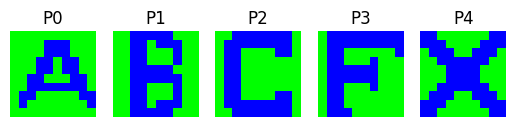

In [5]:
# load the alphabet dictionary
abc_dictionary =pattern_tools.load_alphabet()

# define the letters to be stored in the network
letter_list = ['A', 'B', 'C', 'F', 'X']

print("the letters to be stored in the network are: {}".format(letter_list))

## each pattern has the same shape of (10, 10)
pattern_shape = abc_dictionary[letter_list[0]].shape
## create an instance of the class HopfieldNetwork with the number of neurons
# equal to the number of pixels in the pattern
# (10*10 = 100)
hopfield_net = network.HopfieldNetwork(nr_neurons = pattern_shape[0]*pattern_shape[1])

# # create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# # store the patterns
hopfield_net.store_patterns(pattern_list)

energy of the first state: -105.88
energy of the last state: -105.88



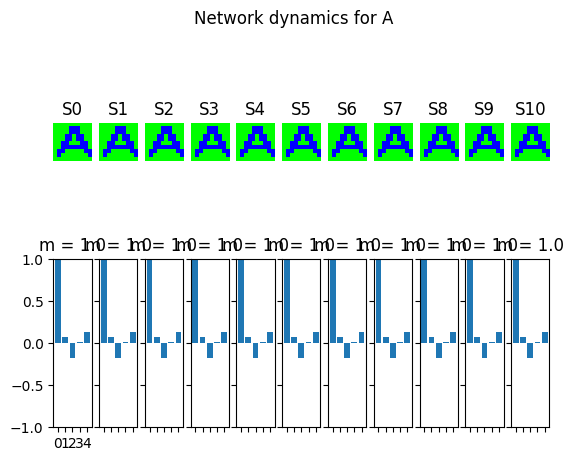

energy of the first state: -121.56
energy of the last state: -121.56



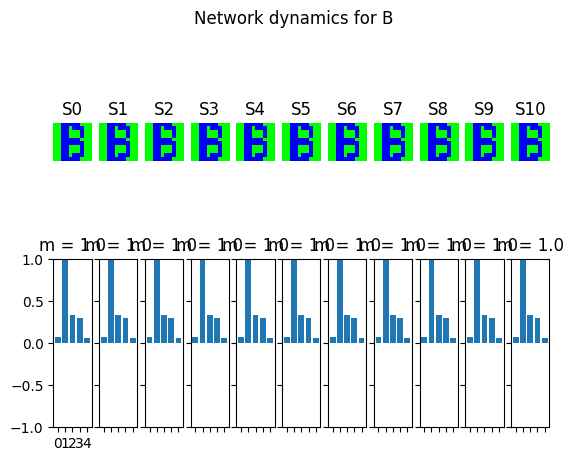

energy of the first state: -133.36000000000004
energy of the last state: -133.87999999999997



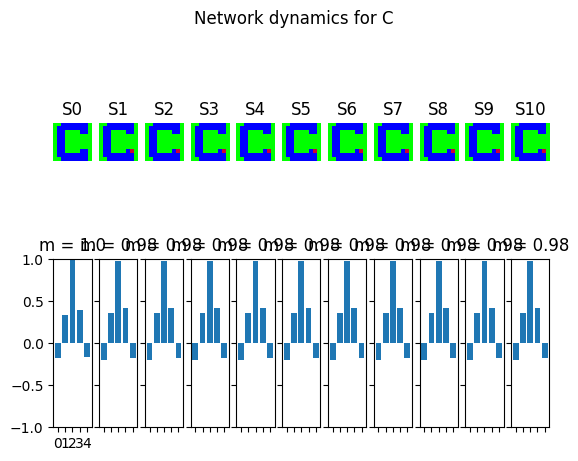

energy of the first state: -126.47999999999999
energy of the last state: -126.47999999999999



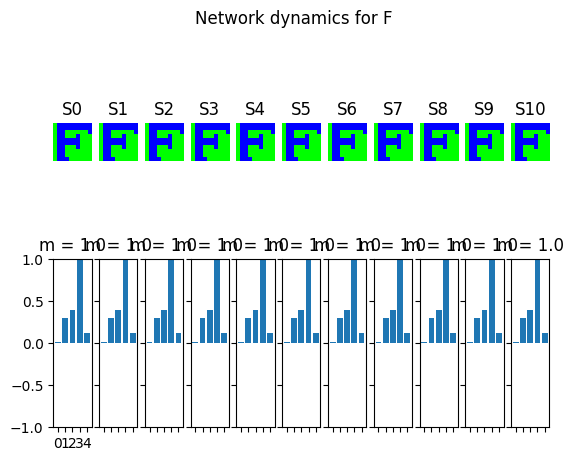

energy of the first state: -106.32
energy of the last state: -106.32



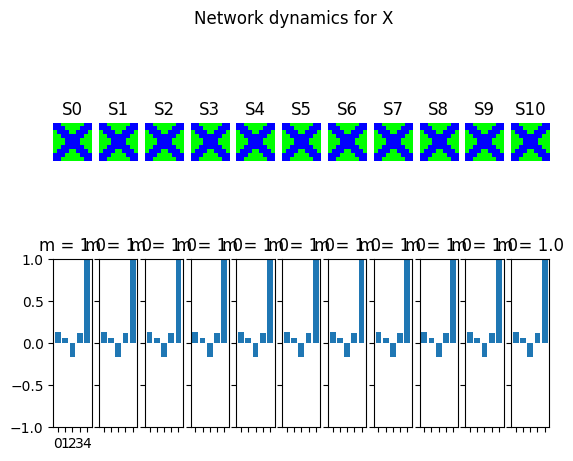

In [ ]:
# check if all patterns are equilibrium states: 
i = 0
for pattern in pattern_list:
    print("energy of the first state: {}".format(
        -100*np.sum(pattern_tools.compute_overlap_list(pattern, pattern_list)**2 )))   
    hopfield_net.set_state_from_pattern(pattern)
    states = hopfield_net.run_with_monitoring(nr_steps=10)
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern.shape)
    print("energy of the last state: {}".format(
        -100*np.sum(pattern_tools.compute_overlap_list(states_as_patterns[-1], pattern_list)**2 )))  
    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=i, suptitle="Network dynamics for {}".format(letter_list[i]))
    i += 1


energy of the first state: -78.03999999999999
energy of the last state: -105.88



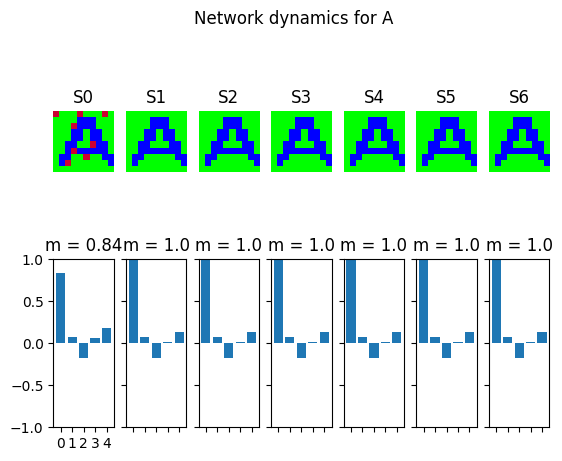

energy of the first state: -81.03999999999999
energy of the last state: -121.56



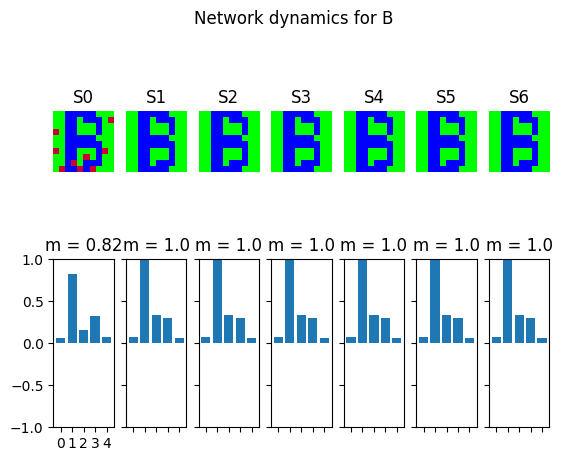

energy of the first state: -85.83999999999999
energy of the last state: -133.87999999999997



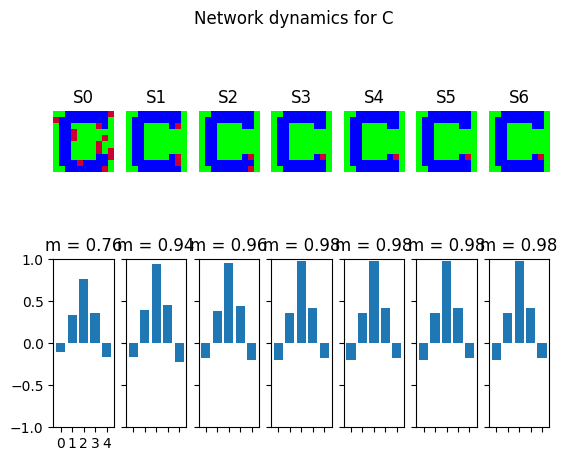

energy of the first state: -76.28
energy of the last state: -126.47999999999999



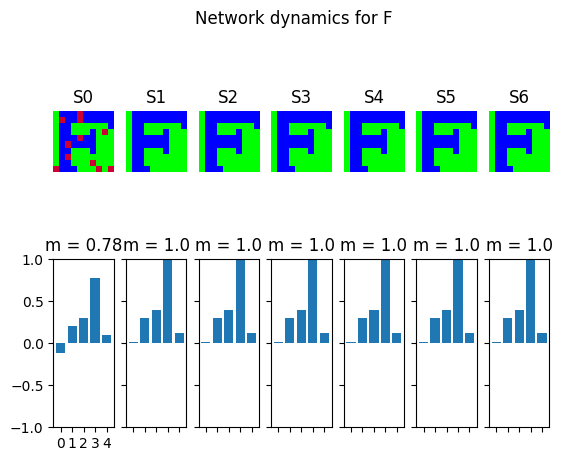

energy of the first state: -68.88000000000001
energy of the last state: -106.32



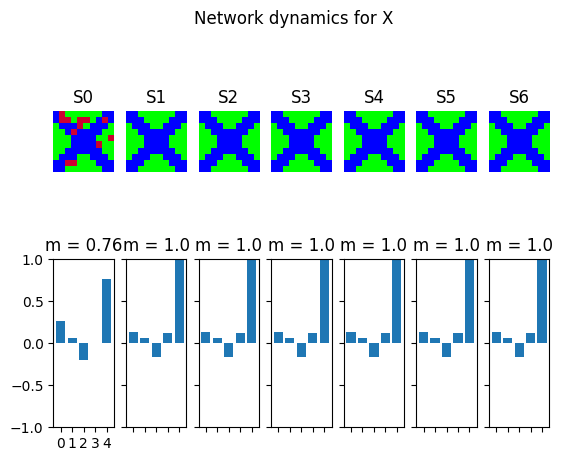

In [7]:
# check if all patterns are attractors states: 
# start from the same noise in the next run
np.random.seed(123)
# start from a noisy pattern: 
i = 0
for pattern in pattern_list:
    noisy_init_state = pattern_tools.get_noisy_copy(pattern, noise_level=0.2)
    hopfield_net.set_state_from_pattern(noisy_init_state)
    states = hopfield_net.run_with_monitoring(nr_steps=6)
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern.shape)
    print("energy of the first state: {}".format(
        -100*np.sum(pattern_tools.compute_overlap_list(noisy_init_state, pattern_list)**2 )))   
    print("energy of the last state: {}".format(
        -100*np.sum(pattern_tools.compute_overlap_list(states_as_patterns[-1], pattern_list)**2 )))    
    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=i, suptitle="Network dynamics for {}".format(letter_list[i]))
    i += 1